<a href="https://colab.research.google.com/github/elaaatif/DATA-ANALYSIS/blob/main/Projet_Analyse_de_donn%C3%A9es_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet Analyse de données :

**1-Analyse univariée**

**2-Analyse bivariée**

**3-analyse multivariée**





Dans le cadre de ce projet d'analyse de données, nous nous appuyons sur le **FHFA House Price Index (FHFA HPI®)**, une collection exhaustive d'indices de prix des logements. Cette source de données publique et complète nous permet d'étudier les variations de la valeur des maisons individuelles à travers les 50 États et plus de 400 villes américaines, depuis le milieu des années 1970. L'analyse des tendances et des fluctuations des prix immobiliers s'appuiera sur cette dataset pour fournir une compréhension approfondie des dynamiques du marché immobilier.

**Dataset:**(lien :https://catalog.data.gov/dataset/fhfa-house-price-indexes-hpis-948c6?fbclid=IwAR1YnU2zj8HUWLuKrn4CCiyxsFIqOysTHJAOI_611-PQn80GT_n-v3efaH4).


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
# Chemin du fichier CSV dans Google Drive
file_path = '/content/drive/My Drive/projet data analysis/HPI_master.csv'

# Lecture du fichier CSV dans un DataFrame
df = pd.read_csv(file_path)


In [8]:
df.head()


,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
0,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,1,100.00,100.00
1,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,2,100.91,100.97
2,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,3,101.31,100.93
3,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,4,101.70,100.99
4,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,5,102.33,101.37


In [9]:
df.shape

(123970, 10)

il y a 123 970 ligne avec 10 caractéristiques ou variables.

# 1-Analyse univariée :

## L'étude de la variable 'hpi_type' :
( qualitatif nominal)

In [19]:
print(df['hpi_type'].describe())

modalites_unique = df['hpi_type'].unique()
print(modalites_unique)


count          123970
unique              4
top       traditional
freq           116768
Name: hpi_type, dtype: object
['traditional' 'non-metro' 'distress-free' 'developmental']


révèle 123 970 valeurs non nulles, avec 4 modalités distinctes(« traditionnel » « non métropolitain » « sans détresse » « développemental »). La modalité la plus fréquente« traditionnel » apparaît 116 768 fois dans cet ensemble de données.

(Mo=mode=La modalité la plus fréquente)

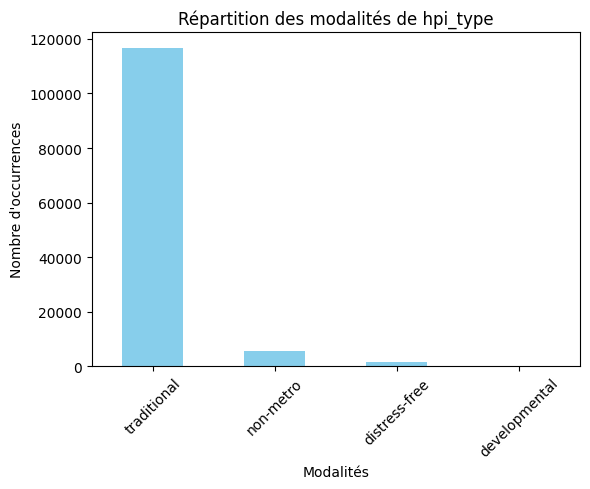

traditional      116768
non-metro          5405
distress-free      1572
developmental       225
Name: hpi_type, dtype: int64


In [12]:
# Compter le nombre d'occurrences de chaque modalité
modalites_count = df['hpi_type'].value_counts()

# Créer un graphique à barres pour visualiser la répartition des modalités
plt.figure(figsize=(6, 5))
modalites_count.plot(kind='bar', color='skyblue')
plt.title('Répartition des modalités de hpi_type')
plt.xlabel('Modalités')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
plt.tight_layout()
plt.show()
print (modalites_count)


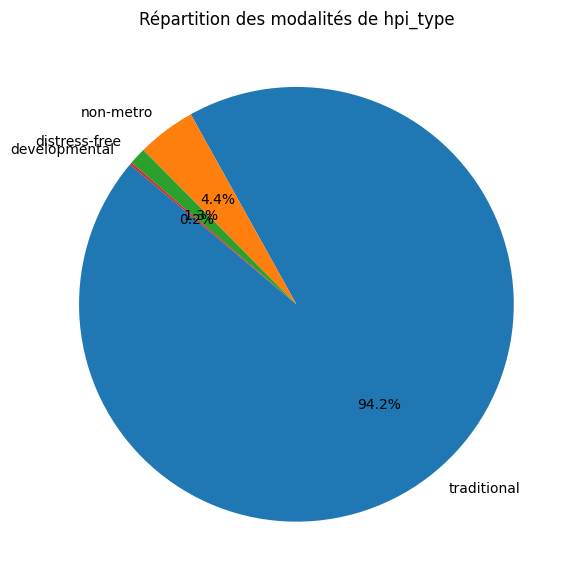

traditional      94.190530
non-metro         4.359926
distress-free     1.268049
developmental     0.181496
Name: hpi_type, dtype: float64


In [22]:
# Calculer les pourcentages des modalités
modalites_count = df['hpi_type'].value_counts(normalize=True) * 100
# Créer un graphique en camembert pour visualiser les pourcentages des modalités
plt.figure(figsize=(6, 6))
plt.pie(modalites_count, labels=modalites_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des modalités de hpi_type')

plt.tight_layout()
plt.show()
print (modalites_count)


**Construction d’un tableau statistique :**

In [18]:
# Compter le nombre d'occurrences de chaque modalité
modalites_count = df['hpi_type'].value_counts()
total_count = modalites_count.sum()

# Calculer les fréquences et les fréquences cumulées
modalites_freq = modalites_count / total_count
modalites_freq_cumsum = modalites_freq.cumsum()

# Créer un DataFrame pour afficher les statistiques
statistiques_df = pd.DataFrame({
    'Effictif': modalites_count,
    'Fréquence': modalites_freq,
    'Effictif cumulé': modalites_count.cumsum(),
    'Fréquence cumulée': modalites_freq_cumsum
})

# Afficher le tableau des statistiques
statistiques_df.head()


,Effictif,Fréquence,Effictif cumulé,Fréquence cumulée
traditional,116768,0.941905,116768,0.941905
non-metro,5405,0.043599,122173,0.985505
distress-free,1572,0.012680,123745,0.998185
developmental,225,0.001815,123970,1.000000


## L'étude de la variable 'hpi_flavor' :
( qualitatif nominal)

In [24]:
print(df['hpi_flavor'].describe())


count               123970
unique                   3
top       all-transactions
freq                 82725
Name: hpi_flavor, dtype: object


In [26]:
print(df['hpi_flavor'].unique())

['purchase-only' 'all-transactions' 'expanded-data']


révèle 123 970 valeurs non nulles, avec 3 modalités distinctes(«purchase» « all-transaction » « expanded-data »). La modalité la plus fréquente« all-transaction » apparaît 82725 fois dans ensemble de données.

**représenter graphique**

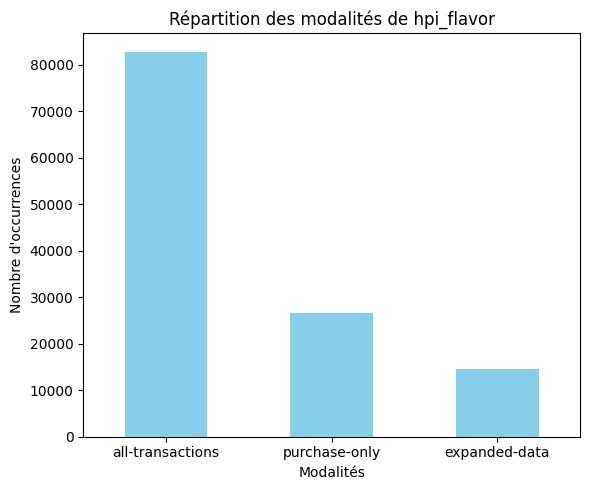

all-transactions    82725
purchase-only       26704
expanded-data       14541
Name: hpi_flavor, dtype: int64


In [32]:
# Compter le nombre d'occurrences de chaque modalité
modalites_count = df['hpi_flavor'].value_counts()
# Créer un graphique à barres pour visualiser la répartition des modalités
plt.figure(figsize=(6, 5))
modalites_count.plot(kind='bar', color='skyblue')
plt.title('Répartition des modalités de hpi_flavor')
plt.xlabel('Modalités')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=0)  # Rotation des étiquettes pour une meilleure lisibilité
plt.tight_layout()
plt.show()
print (modalites_count)

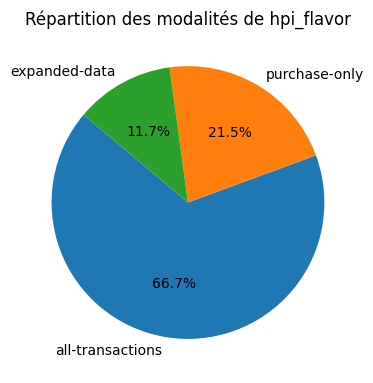

all-transactions    66.729854
purchase-only       21.540695
expanded-data       11.729451
Name: hpi_flavor, dtype: float64


In [34]:
# Calculer les pourcentages des modalités
modalites_count = df['hpi_flavor'].value_counts(normalize=True) * 100
# Créer un graphique en camembert pour visualiser les pourcentages des modalités
plt.figure(figsize=(4, 4))
plt.pie(modalites_count, labels=modalites_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des modalités de hpi_flavor')

plt.tight_layout()
plt.show()
print (modalites_count)

**Construction d’un tableau statistique :**

In [35]:
# Compter le nombre d'occurrences de chaque modalité
modalites_count = df['hpi_flavor'].value_counts()
total_count = modalites_count.sum()

# Calculer les fréquences et les fréquences cumulées
modalites_freq = modalites_count / total_count
modalites_freq_cumsum = modalites_freq.cumsum()

# Créer un DataFrame pour afficher les statistiques
statistiques_df = pd.DataFrame({
    'Effictif': modalites_count,
    'Fréquence': modalites_freq,
    'Effictif cumulé': modalites_count.cumsum(),
    'Fréquence cumulée': modalites_freq_cumsum
})

# Afficher le tableau des statistiques
statistiques_df.head()

,Effictif,Fréquence,Effictif cumulé,Fréquence cumulée
all-transactions,82725,0.667299,82725,0.667299
purchase-only,26704,0.215407,109429,0.882705
expanded-data,14541,0.117295,123970,1.000000


## L'étude de la variable 'level'





In [39]:
print(df['level'].describe())
print(df['level'].unique())

count     123970
unique         4
top          MSA
freq       86533
Name: level, dtype: object
['USA or Census Division' 'MSA' 'State' 'Puerto Rico']


4 modalités («USA or Ceensus Division» « MSA » « state» « Puerto Rico»). La modalité la plus fréquente« MSA » apparaît 86533 fois dans ensemble de données.

**représenter graphique**

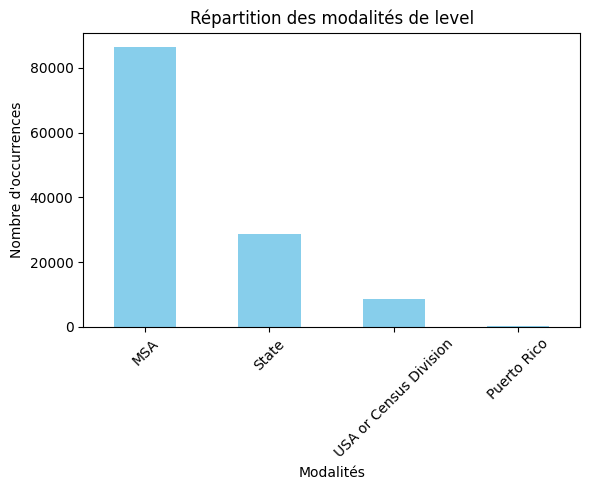

MSA                       86533
State                     28712
USA or Census Division     8500
Puerto Rico                 225
Name: level, dtype: int64


In [42]:
# Compter le nombre d'occurrences de chaque modalité
modalites_count = df['level'].value_counts()
# Créer un graphique à barres pour visualiser la répartition des modalités
plt.figure(figsize=(6, 5))
modalites_count.plot(kind='bar', color='skyblue')
plt.title('Répartition des modalités de level')
plt.xlabel('Modalités')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
plt.tight_layout()
plt.show()
print (modalites_count)

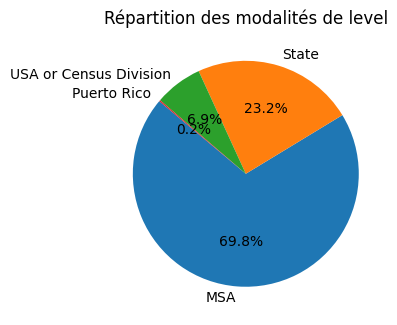

MSA                       69.801565
State                     23.160442
USA or Census Division     6.856498
Puerto Rico                0.181496
Name: level, dtype: float64


In [40]:
# Calculer les pourcentages des modalités
modalites_count = df['level'].value_counts(normalize=True) * 100
# Créer un graphique en camembert pour visualiser les pourcentages des modalités
plt.figure(figsize=(4, 4))
plt.pie(modalites_count, labels=modalites_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des modalités de level')

plt.tight_layout()
plt.show()
print (modalites_count)

In [43]:
# Compter le nombre d'occurrences de chaque modalité
modalites_count = df['level'].value_counts()
total_count = modalites_count.sum()

# Calculer les fréquences et les fréquences cumulées
modalites_freq = modalites_count / total_count
modalites_freq_cumsum = modalites_freq.cumsum()

# Créer un DataFrame pour afficher les statistiques
statistiques_df = pd.DataFrame({
    'Effictif': modalites_count,
    'Fréquence': modalites_freq,
    'Effictif cumulé': modalites_count.cumsum(),
    'Fréquence cumulée': modalites_freq_cumsum
})

# Afficher le tableau des statistiques
statistiques_df.head()

,Effictif,Fréquence,Effictif cumulé,Fréquence cumulée
MSA,86533,0.698016,86533,0.698016
State,28712,0.231604,115245,0.929620
USA or Census Division,8500,0.068565,123745,0.998185
Puerto Rico,225,0.001815,123970,1.000000


## L'étude de la variable 'palce name' :

In [46]:
print(df['place_name'].describe())


count                          123970
unique                            466
top       East North Central Division
freq                              850
Name: place_name, dtype: object


MO=Mode=Est North Central Division
, Ef=850

**représenter graphique**

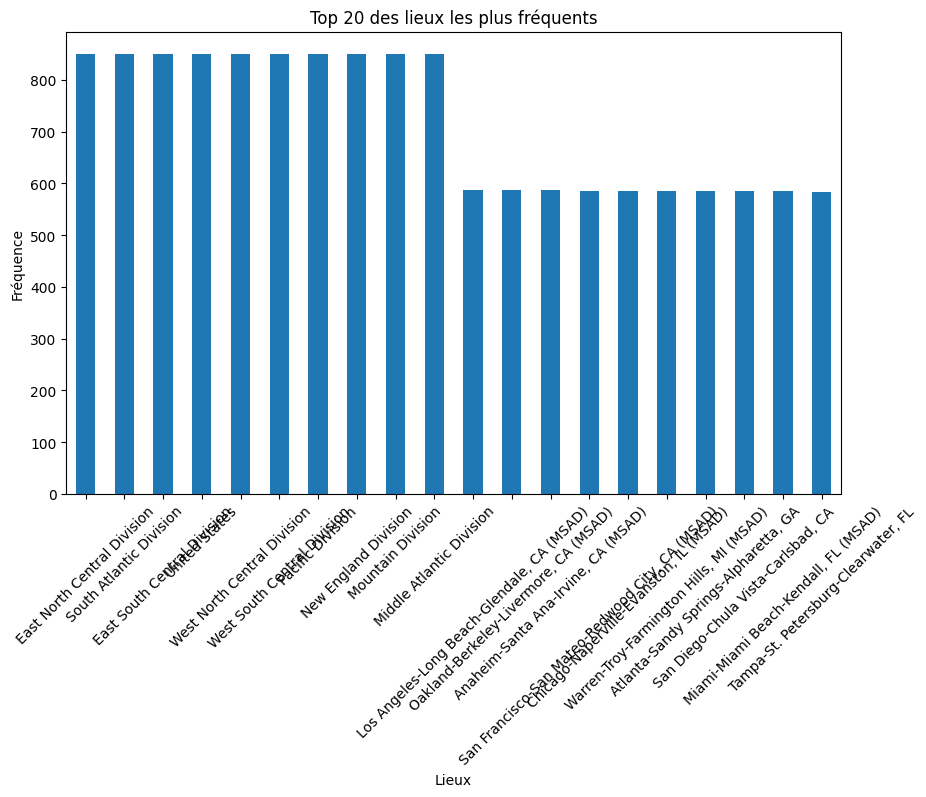

Les 15 lieux les plus fréquents :
 East North Central Division                        850
South Atlantic Division                            850
East South Central Division                        850
United States                                      850
West North Central Division                        850
West South Central Division                        850
Pacific Division                                   850
New England Division                               850
Mountain Division                                  850
Middle Atlantic Division                           850
Los Angeles-Long Beach-Glendale, CA (MSAD)         588
Oakland-Berkeley-Livermore, CA (MSAD)              587
Anaheim-Santa Ana-Irvine, CA (MSAD)                587
San Francisco-San Mateo-Redwood City, CA (MSAD)    586
Chicago-Naperville-Evanston, IL (MSAD)             586
Name: place_name, dtype: int64


In [51]:
plt.figure(figsize=(10, 6))
df['place_name'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 des lieux les plus fréquents')
plt.xlabel('Lieux')
plt.ylabel('Fréquence')
plt.xticks(rotation=45)
plt.show()

# Comptage des lieux les plus fréquents
top_places = df['place_name'].value_counts().head(15)
print("Les 15 lieux les plus fréquents :\n", top_places)

## L'étude de la variable 'years':

In [55]:
print(df['yr'].describe())

count    123970.000000
mean       2003.985634
std          11.761904
min        1975.000000
25%        1995.000000
50%        2005.000000
75%        2014.000000
max        2023.000000
Name: yr, dtype: float64


In [59]:
variance_yr = df['yr'].var()
print(variance_yr)

138.34238731843502


La colonne 'yr' présente une variabilité temporelle notable, couvrant une période allant de 1975 à 2023. Sa moyenne se situe autour de 2004, avec une dispersion d'environ ±11,76 ans autour de cette moyenne, illustrée par l'écart type. Les enregistrements montrent que la moitié des données se trouvent autour de l'année 2005 (médiane), avec 25% des données antérieures à 1995 et 75% antérieures à 2014 (quartiles). La variance de 138,34 indique la diversité des années par rapport à cette moyenne de 2004.

**Mesures de forme**

In [60]:
skewness_yr = df['yr'].skew()  # Asymétrie
kurtosis_yr = df['yr'].kurtosis()  # Aplatissement
print(f"Asymétrie: {skewness_yr}")
print(f"Aplatissement: {kurtosis_yr}")

Asymétrie: -0.2714510814807819
Aplatissement: -0.7968196927123388


La distribution des années présente une légère asymétrie négative (-0.27), indiquant une queue gauche un peu plus longue que la droite par rapport à la moyenne. De plus, l'aplatissement négatif (-0.79) suggère une distribution moins concentrée autour de la moyenne, avec des extrémités moins épaisses que celles d'une distribution normale.

**Représenter graphique**

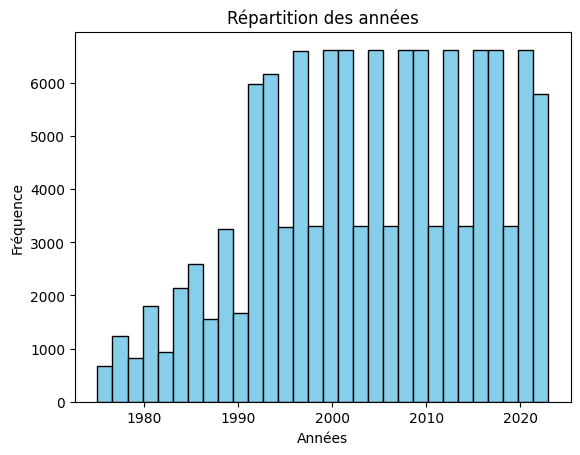

In [61]:
plt.hist(df['yr'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Années')
plt.ylabel('Fréquence')
plt.title('Répartition des années')
plt.show()

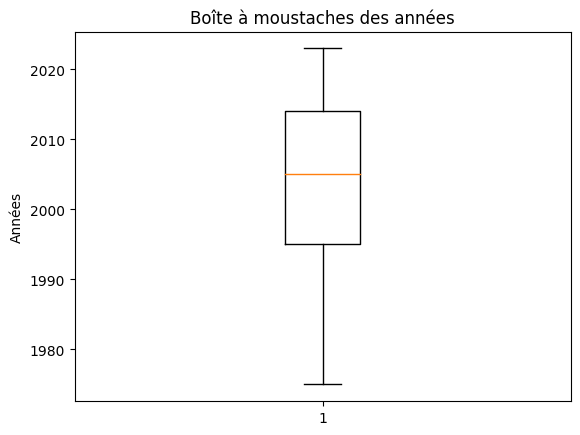

In [62]:
plt.boxplot(df['yr'])
plt.ylabel('Années')
plt.title('Boîte à moustaches des années')
plt.show()

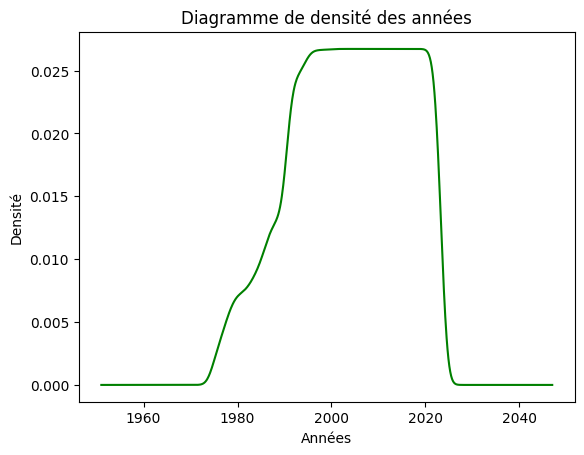

In [63]:
df['yr'].plot(kind='density', color='green')
plt.xlabel('Années')
plt.ylabel('Densité')
plt.title('Diagramme de densité des années')
plt.show()

In [44]:
df.head()

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
0,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,1,100.00,100.00
1,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,2,100.91,100.97
2,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,3,101.31,100.93
3,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,4,101.70,100.99
4,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,5,102.33,101.37


## L'étude de la variable 'Index NSA (Not Seasonally Adjusted)':

In [67]:
print(df['index_nsa'].describe())

variance=df['index_nsa'].var()
print("Variance:",variance)
# Calcul de l'étendue
etendue = df['index_nsa'].max() - df['index_nsa'].min()
print("Étendue :", etendue)

count    123969.000000
mean        178.196744
std          97.409691
min          18.520000
25%         109.420000
50%         160.160000
75%         215.190000
max        1181.990000
Name: index_nsa, dtype: float64
Variance: 9488.647942328535
Étendue : 1163.47


**Moyenne (mean) :** La moyenne des prix des maisons est d'environ 178.20.

**Écart type (std) :** L'écart type de 97.41 montre la dispersion des valeurs autour de la moyenne.

**Minimum et Maximum (min et max) :** Les prix varient de 18.52 à 1181.99, illustrant l'amplitude des données.

**Quartiles (25%, 50%, 75%) :** Ces valeurs indiquent la distribution des prix des maisons. Par exemple, 25% des prix sont inférieurs à 109.42 et 75% sont inférieurs à 215.19.

**Variance :** La variance, mesurant la dispersion des valeurs par rapport à la moyenne, est de 9488.65.

**Étendue :** L'étendue des données (différence entre la valeur maximale et minimale) est de 1163.47.

**Mesures de forme :**

In [69]:
skewness_yr = df['index_nsa'].skew()  # Asymétrie
kurtosis_yr = df['index_nsa'].kurtosis()  # Aplatissement
print(f"Asymétrie: {skewness_yr}")
print(f"Aplatissement: {kurtosis_yr}")

Asymétrie: 2.0292903614350783
Aplatissement: 7.446864314027209


Les statistiques des indices des prix des maisons ('index_nsa') indiquent une distribution asymétrique positive avec une tendance vers les valeurs plus élevées.

 La dispersion des données est marquée, suggérant une concentration significative autour de la moyenne avec des valeurs extrêmes importantes, donnant ainsi une distribution plus pointue avec des queues plus lourdes que dans une distribution normale.

**Représenter graphique**

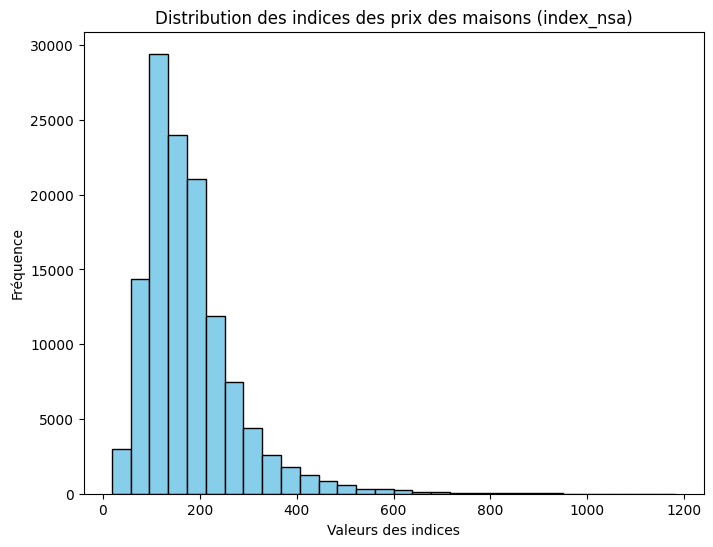

In [70]:
plt.figure(figsize=(8, 6))
plt.hist(df['index_nsa'], bins=30, color='skyblue', edgecolor='black')

# Ajout de titres et d'étiquettes
plt.title('Distribution des indices des prix des maisons (index_nsa)')
plt.xlabel('Valeurs des indices')
plt.ylabel('Fréquence')

# Affichage de l'histogramme
plt.show()

#2-Analyse bivariée: